# Radar observations : rainfall composite product, rainfall

The aim of this notebook is to help you read the rainfall data.

For each radar data type, you will find one archive per year and per zone, each one sliced in periods of 10 or 11 days (each month is separated in 3 files). 

Each `.npz` file contains 3 arrays :

* `data` : an array containing maps of radar data values.

* `dates` : an array containing a datetime object and indicating the date of each `data` map.

* `miss_dates` : an array containing a datetime object for each missing radar map over the period.

Here, the `data` array contains a rainfall map for each time step. For each pixel, the value represents the cumulated rainfall in hundreth of millimeters (10<sup>-2</sup> mm). If the value is missing then the value is -1.

The time step between two radar scans is 5 min. The radar starts scanning at 00h every day and ends at 23h55. So each file of 11 days should contain a maximum of 3168 rainfall maps (minus the missing dates).

The radar's spatial resolution is 0.01° and the projection system used is EPSG:4326.

You will also find a `radar_coords_ZONE.npz` file containing 2 arrays `lats` and `lons`, indicating the coordinates (latitude and longitude) of the center of each radar pixel.

For more information, cf [documentation](https://meteofrance.github.io/meteonet/english/data/rain-radar/).

# Quickstart

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import colors

First, let's select the zone and date we want to study : 

In [2]:
zone = "NW"
year = 2016
month = 8
part_month = 3 # Choice between 1,2,3, as we said earlier each month is divided in 3 parts

Now, we load the data and the coordinates :

In [3]:
directory = "../../data_samples/radar/"
fname = directory + f'rainfall_{zone}_{str(year)}_{str(month).zfill(2)}.{str(part_month)}.npz'
fname_coords = directory + f'radar_coords_{zone}.npz'

d = np.load(fname, allow_pickle=True)
data = d['data']
dates = d['dates']
miss_dates = d['miss_dates']

coords = np.load(fname_coords, allow_pickle=True)
#it is about coordinates of the center of pixels 
lat = coords['lats']
lon = coords['lons']

Let's plot some examples :

<IPython.core.display.Javascript object>


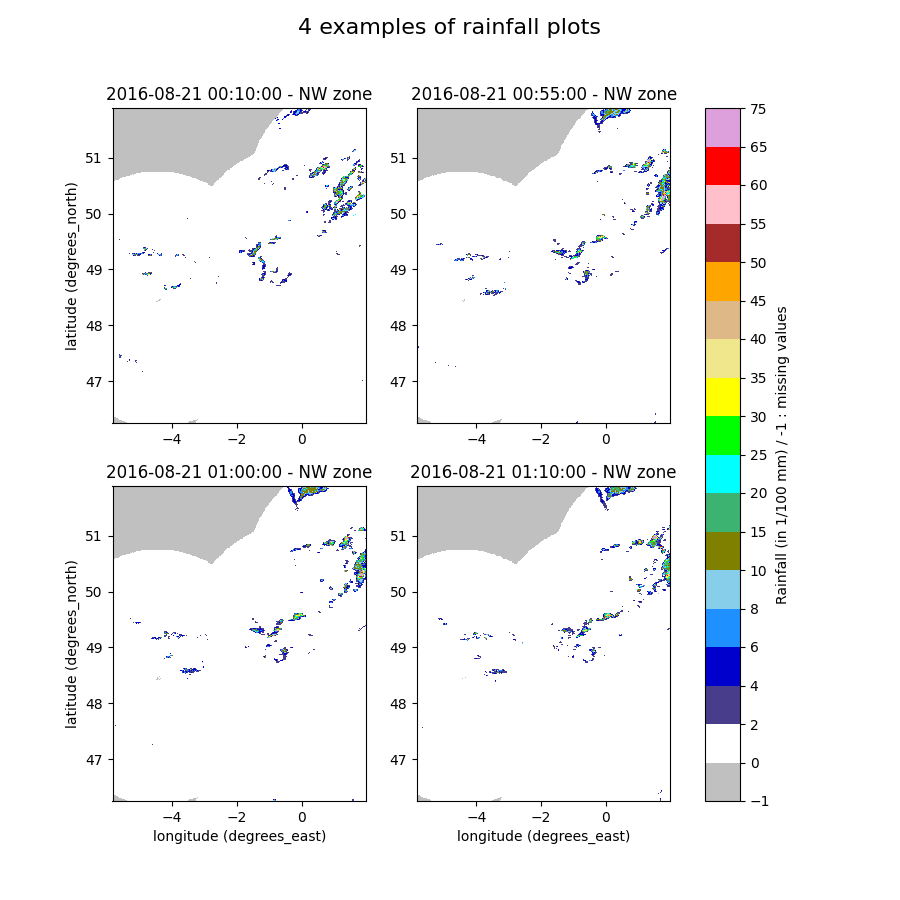

/opt/anaconda3/envs/preproc/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if sys.path[0] == '':
/opt/anaconda3/envs/preproc/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  app.launch_new_instance()
/opt/anaconda3/envs/preproc/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dime

In [4]:
title = "4 examples of rainfall plots"
fig, ax = plt.subplots(2, 2,figsize=(9,9))
fig.suptitle(title, fontsize=16)

# Choose the colormap
cmap = colors.ListedColormap(['silver','white', 'darkslateblue', 'mediumblue','dodgerblue', 
                              'skyblue','olive','mediumseagreen','cyan','lime','yellow',
                              'khaki','burlywood','orange','brown','pink','red','plum'])
bounds = [-1,0,2,4,6,8,10,15,20,25,30,35,40,45,50,55,60,65,75]
norm = colors.BoundaryNorm(bounds, cmap.N)

pl=ax[0,0].pcolormesh(lon, lat, data[0,:,:],cmap=cmap, norm=norm)
ax[0,0].set_ylabel('latitude (degrees_north)')
ax[0,0].set_title(str(dates[0]) + " - "+  zone + " zone")

pl=ax[0,1].pcolormesh(lon, lat, data[1,:,:],cmap=cmap, norm=norm)
ax[0,1].set_title(str(dates[1]) + " - "+  zone + " zone")

pl=ax[1,0].pcolormesh(lon, lat, data[2,:,:],cmap=cmap, norm=norm)
ax[1,0].set_xlabel('longitude (degrees_east)')
ax[1,0].set_ylabel('latitude (degrees_north)')
ax[1,0].set_title(str(dates[2]) + " - "+  zone + " zone")

pl=ax[1,1].pcolormesh(lon, lat, data[3,:,:],cmap=cmap, norm=norm)
ax[1,1].set_xlabel('longitude (degrees_east)')
ax[1,1].set_title(str(dates[3]) + " - "+  zone + " zone")

# Plot the color bar
cbar = fig.colorbar(pl,ax=ax.ravel().tolist(),cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds, 
                orientation= 'vertical').set_label('Rainfall (in 1/100 mm) / -1 : missing values')
plt.show()

## Exploring the data

### Data

Dimensions of the ```data``` array: 

* Number of records : the radar records a scan every 5 min

* Number of points on the y axis : latitude

* Number of points on the x axis : longitude

In [ ]:
data.shape

### Dates

Dimension of the ```dates``` array: 

* Number of records : the radar records a scan every 5 min

In [ ]:
dates.shape

In [ ]:
dates[:5]

### Missing dates

Dimension of the ```miss_dates``` array: 

* Number of missing records

In [ ]:
miss_dates.shape

### Latitude

In [ ]:
lat.shape

In [ ]:
lat

# Plot with Cartopy

In [ ]:
from meteonet_toolbox.constant import DOMAINS
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [ ]:
#coordinates of study zone boundaries
lllat=DOMAINS[zone]['lry']    #lower left latitude
urlat=DOMAINS[zone]['uly']    #upper right latitude
lllon=DOMAINS[zone]['ulx']    #lower left longitude
urlon=DOMAINS[zone]['lrx']    #upper right longitude
extent = [lllon, urlon, lllat, urlat]

Define the boundaries of the area we want to plot :

In [ ]:
fig = plt.figure(figsize=(9,10))

# Select projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the data
plt.imshow(data[0], interpolation='none', origin='upper',cmap=cmap, norm=norm, extent=extent)

# Add coastlines and borders
ax.coastlines(resolution='50m', linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

# Show only the area we defined
ax.set_extent(extent)

# Add the colorbar
plt.colorbar(cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds, 
             orientation= 'horizontal').set_label('Rainfall (in 1/100 mm) / -1 : missing values')
plt.title("Rainfalls - "+ str(dates[0]) + " - "+  zone + " zone")
plt.show()